In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

In [3]:
def getBinaryData():
    Y = []
    X = []
    first = True  # to exclude the header
    for line in open('fer2013.csv'):
        if first:
            first = False  # excluded the header
        else:
            row = line.split(',')
            y = int(row[0])
            if y == 0 or y == 1: # just sampling the binary data for this solution
                Y.append(y)
                X.append([int(p) for p in row[1].split()])
    return np.array(X) / 255 , np.array(Y)   # pixel intensities 0 to 255, so normalize X

In [5]:
def sigmoid(A):
    return 1 / (1 + np.exp(-A))

In [6]:
def sigmoid_cost(T, Y): # target and predicted values
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()  # negative log-likelihood across all the data points. It needs to be minimized.

In [7]:
def error_rate(targets, predictions):
    return np.mean(targets != predictions)

### Now we are going to code our Logistic Regression Model in a class so that we can use it as an object.

In [14]:
class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate = 10e-7, reg = 0, epochs = 120000, show_fig = False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]  # last 1000 values as my validation set
        X, Y = X[:-1000], Y[:-1000] # n - 1000 values as my train set
        
        N, D = X.shape
        
        self.W = np.random.randn(D) / np.sqrt(D) # initialize our weights
        self.b = 0 # bias would be 0
        
        costs = []
        best_validation_error = 1
        for i in range(epochs):
            pY = self.forward(X) # probability of Y given X
            
            # Gradient Descent Step-
            self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W)  
            # adding the regularization term to the gradient of the negative log likelihood function and performing gradient desc
            self.b -= learning_rate*((pY - Y).sum() + reg*self.b)  # bias term
            
            if i % 1000 == 0:  # in every 1000 steps we calculate the cost of the validation set
                pYvalid = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)  # calculating the cost
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e  # we keep a track of the best validation error
        print("best_validation_error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
    
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

i: 0 cost: 715.723144285 error: 0.547
i: 1000 cost: 608.053059029 error: 0.315
i: 2000 cost: 587.676922728 error: 0.293
i: 3000 cost: 574.447482151 error: 0.291
i: 4000 cost: 564.567730513 error: 0.289
i: 5000 cost: 556.707334019 error: 0.287
i: 6000 cost: 550.198647164 error: 0.281
i: 7000 cost: 544.654261326 error: 0.275
i: 8000 cost: 539.830144076 error: 0.27
i: 9000 cost: 535.563379659 error: 0.268
i: 10000 cost: 531.740146883 error: 0.265
i: 11000 cost: 528.277923314 error: 0.265
i: 12000 cost: 525.1150114 error: 0.261
i: 13000 cost: 522.204080821 error: 0.258
i: 14000 cost: 519.508027158 error: 0.252
i: 15000 cost: 516.997223561 error: 0.251
i: 16000 cost: 514.647640999 error: 0.25
i: 17000 cost: 512.439527629 error: 0.247
i: 18000 cost: 510.3564585 error: 0.238
i: 19000 cost: 508.384636954 error: 0.235
i: 20000 cost: 506.512371152 error: 0.233
i: 21000 cost: 504.729675076 error: 0.23
i: 22000 cost: 503.027959731 error: 0.228
i: 23000 cost: 501.39979092 error: 0.226
i: 24000 cost

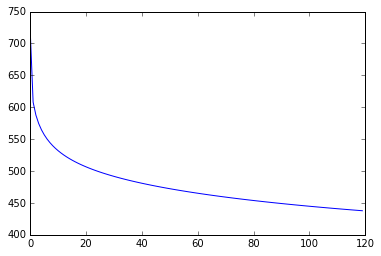

In [15]:
def main():
    X, Y = getBinaryData() # it retrieves our data
    
    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X1 = np.repeat(X1, 9, axis=0) # oversampling X1 as it is 9 times less than the X0 data points
    X = np.vstack([X0, X1])  # vertically stack them
    Y = np.array([0]*len(X0) + [1]*len(X1))
    
    model = LogisticModel()
    model.fit(X, Y, show_fig = True)
    model.score(X, Y)
    
if __name__ == '__main__':
    main()